In [113]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import jieba
from collections import Counter
from wordcloud import WordCloud
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
import math
import networkx as nx
from geopy.distance import geodesic
import pkuseg

In [123]:
seg = pkuseg.pkuseg(model_name='news', user_dict='my_dict.txt') 

In [140]:
def single_color_func(word=None, font_size=None, position=None, orientation=None,
                      font_path=None, random_state=None):
    
    # return '#E13E1B' # 杜苏芮
    return '#398A1D' #苏拉
    # return '#4D00E5' # 紫色
    # return '#E87B20' #海葵
    # return '#3D50C6' #泰利
    
# oval mask
def create_oval_mask(width, height):
    mask = np.ones((height, width), dtype=np.uint8) * 255
    rr, cc = np.ogrid[:height, :width]
    ellipse = (rr - height / 2) ** 2 + (cc - width / 2) ** 2 <= (height / 2) ** 2
    mask[ellipse] = 0  
    return mask
    
def create_word_cloud(words, type):
    wc = WordCloud(font_path="/System/Library/fonts/PingFang.ttc",
                   collocations=False,
                   background_color=(255,255,255),
                   color_func=single_color_func,
                   scale=4,
                   width=600,
                   height=150,
                   max_font_size = 100,
                   random_state=2024,
                   # mask=mask
                  ).generate(" ".join(words))
    plt.imshow(wc)  
    plt.axis('off')
    plt.savefig('./Figures/temp/' + type + '.pdf', format='pdf', bbox_inches='tight', dpi=300)
    plt.show()

def cut_text(text):
    stopwords = ['，', '！', '、', '；', '。', ' ', '“', '”', '—', '—', '在', '等', '级', '号', '：', '或','～','👇',
                '的', '是', ',', '（', '）', '--',  ';', ':', '+', '日', '月', '和', '习近平', '有']
    words = []
    # ws = jieba.lcut(text)
    ws = seg.cut(text)
    ws = [w for w in ws if w not in stopwords]
    return ws

def show(data, type, is_en=False):
    desc = data
    words = []
    for i in desc:
        words += cut_text(i)
    
    create_word_cloud(words, type)
    print(Counter(words).most_common(50))

In [141]:
def get_typhoon_news(CN_NAME, start_time, end_time):
    temp = df[df['text'].str.contains(CN_NAME, na=False)].copy()
    temp['date'] = pd.to_datetime(temp['date'])
    filtered_df = temp[(temp['date'] >= start_time) & (temp['date'] <= end_time)]
    return filtered_df

In [142]:
df = pd.read_csv('./data/typhoon.csv')
# 杜苏芮: 2023年7月20日 - 2023年7月30日
# 苏拉: 2023年8月22日 - 2023年9月4日
typhoon_time_TT = {
    '杜苏芮': ('Doksuri', '2023-07-15 00:00:00', '2023-08-04 23:59:59'),
    '苏拉': ('Saola', '2023-08-17 00:00:00', '2023-09-09 23:59:59'),
    '卡努': ('Khanun', '2023-07-21 00:00:00', '2023-08-20 23:59:59'),
    '海葵': ('Haikui', '2023-08-22 00:00:00', '2023-09-11 23:59:59'),
    '泰利': ('Talim', '2023-07-08 00:00:00', '2023-07-24 23:59:59'),
}

## 杜苏芮

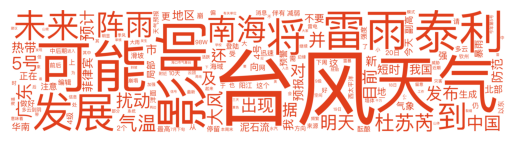

[('台风', 51), ('天气', 26), ('可能', 21), ('影响', 20), ('泰利', 19), ('雷雨', 17), ('发展', 16), ('将', 15), ('未来', 15), ('南海', 15), ('到', 15), ('阵雨', 14), ('杜苏芮', 12), ('气温', 11), ('5号', 9), ('中国', 9), ('扰动', 9), ('广东', 9), ('明天', 9), ('并', 9), ('大风', 9), ('出现', 9), ('发布', 9), ('还', 8), ('据', 8), ('及', 8), ('目前', 8), ('对', 8), ('预计', 8), ('热带', 8), ('防范', 8), ('菲律宾', 7), ('新', 7), ('我国', 7), ('地区', 7), ('短时', 7), ('我', 7), ('市', 7), ('预报', 7), ('泥石流', 7), ('不要', 7), ('4号', 6), ('正在', 6), ('向', 6), ('北部', 6), ('生成', 6), ('华南', 6), ('地', 6), ('这', 6), ('气象', 6)]


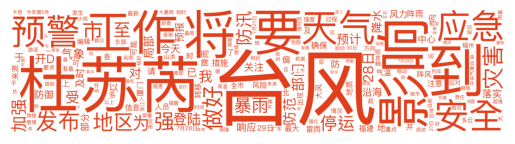

[('台风', 7591), ('杜苏芮', 3547), ('到', 3146), ('影响', 2928), ('将', 2889), ('要', 2649), ('工作', 2437), ('天气', 2416), ('预警', 2043), ('安全', 2028), ('应急', 1994), ('发布', 1968), ('灾害', 1927), ('做好', 1871), ('市', 1790), ('强', 1695), ('地区', 1668), ('停运', 1656), ('暴雨', 1639), ('防汛', 1619), ('至', 1617), ('为', 1581), ('加强', 1493), ('登陆', 1444), ('受', 1409), ('我', 1385), ('部门', 1374), ('防范', 1369), ('28日', 1336), ('预计', 1307), ('对', 1298), ('气象', 1271), ('开D', 1262), ('局部', 1189), ('降水', 1188), ('今天', 1183), ('及时', 1180), ('防御', 1178), ('于', 1174), ('落实', 1158), ('响应', 1157), ('沿海', 1138), ('关注', 1097), ('预报', 1083), ('已', 1068), ('风力', 1050), ('防', 1033), ('以', 1031), ('部分', 1018), ('措施', 1017)]


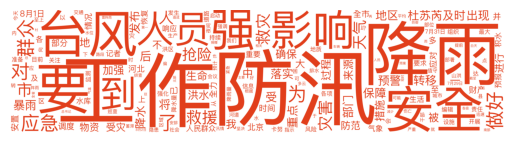

[('防汛', 929), ('工作', 869), ('降雨', 630), ('要', 624), ('台风', 595), ('安全', 580), ('强', 562), ('影响', 517), ('人员', 505), ('到', 489), ('应急', 486), ('群众', 466), ('了', 463), ('对', 462), ('做好', 444), ('为', 435), ('救援', 421), ('救灾', 412), ('市', 406), ('灾害', 400), ('抢险', 393), ('天气', 376), ('人', 365), ('杜苏芮', 362), ('部门', 357), ('预警', 356), ('将', 342), ('受', 339), ('出现', 337), ('转移', 334), ('暴雨', 333), ('地区', 329), ('保障', 314), ('后', 311), ('落实', 302), ('及时', 296), ('降水', 296), ('发布', 295), ('重点', 295), ('确保', 292), ('生命', 284), ('加强', 278), ('洪水', 278), ('地', 274), ('措施', 272), ('一', 272), ('我', 270), ('被', 267), ('中', 258), ('过程', 252)]


In [139]:
Do_T1 = get_typhoon_news('杜苏芮', '2023-07-15 00:00:00', '2023-07-19 23:59:59')
Do_T2 = get_typhoon_news('杜苏芮', '2023-07-20 00:00:00', '2023-07-30 23:59:59')
Do_T3 = get_typhoon_news('杜苏芮', '2023-07-31 00:00:00', '2023-08-04 23:59:59')
show(Do_T1['text'].tolist(), '杜苏芮_T1')
show(Do_T2['text'].tolist(), '杜苏芮_T2')
show(Do_T3['text'].tolist(), '杜苏芮_T3')

## 苏拉

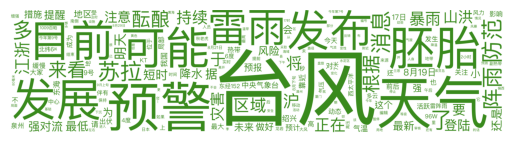

[('台风', 54), ('天气', 19), ('预警', 17), ('胚胎', 13), ('发展', 12), ('可能', 12), ('目前', 11), ('发布', 11), ('雷雨', 11), ('苏拉', 10), ('防范', 10), (')', 10), ('了', 10), ('多', 9), ('阵雨', 9), ('消息', 9), ('酝酿', 9), ('来看', 9), ('根据', 9), ('(', 9), ('区域', 9), ('江浙', 9), ('沪', 9), ('暴雨', 8), ('正在', 8), ('将', 8), ('持续', 8), ('于', 8), ('山洪', 8), ('灾害', 8), ('注意', 8), ('要', 8), ('登陆', 8), ('明天', 8), ('据', 7), ('短时', 7), ('降水', 7), ('强对流', 7), ('最低', 7), ('还是', 7), ('提醒', 7), ('风险', 7), ('为', 7), ('最新', 7), ('未来', 6), ('会', 6), ('小', 6), ('8月19日', 6), ('强', 6), ('预报', 6)]


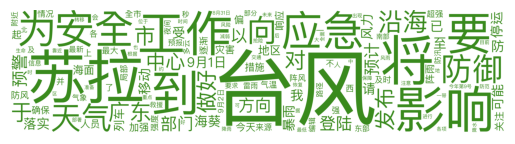

[('台风', 7013), ('苏拉', 2976), ('将', 2506), ('影响', 2093), ('到', 1970), ('工作', 1939), ('要', 1700), ('应急', 1467), ('为', 1445), ('安全', 1439), ('防御', 1416), ('天气', 1380), ('向', 1377), ('沿海', 1329), ('广东', 1307), ('做好', 1298), ('发布', 1288), ('于', 1266), ('市', 1232), ('对', 1197), ('部门', 1113), ('方向', 1105), ('登陆', 1103), ('预警', 1097), ('中心', 1089), ('预计', 1081), ('以', 1063), ('9月1日', 1022), ('至', 1019), ('海葵', 1003), ('落实', 985), ('我', 981), ('风力', 953), ('受', 926), ('停运', 919), ('已', 882), ('可能', 878), ('移动', 868), ('防', 851), ('请', 849), ('暴雨', 848), ('地区', 841), ('列车', 839), ('海面', 833), ('加强', 824), ('措施', 817), ('今天', 814), ('人员', 802), ('灾害', 790), ('起', 762)]


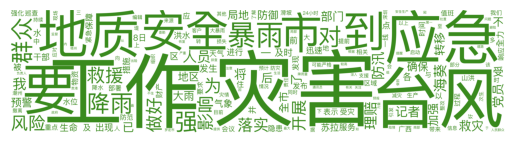

[('灾害', 91), ('工作', 86), ('台风', 76), ('应急', 67), ('要', 64), ('地质', 56), ('安全', 56), ('市', 54), ('到', 51), ('暴雨', 47), ('降雨', 44), ('群众', 43), ('对', 42), ('强', 41), ('救援', 41), ('为', 39), ('风险', 38), ('做好', 38), ('影响', 37), ('落实', 37), ('开展', 37), ('人员', 36), ('理赔', 36), ('海葵', 34), ('我', 33), ('防汛', 33), ('记者', 32), ('将', 32), ('了', 32), ('救灾', 32), ('党员', 32), ('部门', 30), ('后', 30), ('加强', 29), ('转移', 29), ('已', 29), ('局地', 29), ('防御', 28), ('确保', 27), ('地区', 27), ('不', 27), ('一', 27), ('预警', 26), ('受', 26), ('大雨', 26), ('全市', 26), ('及时', 26), ('发生', 25), ('苏拉', 25), ('出现', 25)]


In [143]:
Sa_T1 = get_typhoon_news('苏拉', '2023-08-17 00:00:00', '2023-08-21 23:59:59')
Sa_T2 = get_typhoon_news('苏拉', '2023-08-22 00:00:00', '2023-09-04 23:59:59')
Sa_T3 = get_typhoon_news('苏拉', '2023-09-05 00:00:00', '2023-09-09 23:59:59')
show(Sa_T1['text'].tolist(), '苏拉_T1')
show(Sa_T2['text'].tolist(), '苏拉_T2')
show(Sa_T3['text'].tolist(), '苏拉_T3')